## Feature Selection Techniques in Machine Learning

In real-world machine learning use cases,it is rare that all the features/independent variables are relevent to build a model.using such redundant feature by lack of domain knowledge reduces the generalization capacity and increases the overall complexity of the model.Hence feature selection becomes crucial part in model building.

The main aim of the feature selection process is to find a best set of features to buid a generalized model.
It can be classified in to two categories

The feature selection techniques can be classified under:
###### A.Filter Methods
###### B.Wrapper Methods
###### C.Embedded Methods

#### A. Filter Methods
Filter methods pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. These methods are faster and less computationally expensive than wrapper methods. When dealing with high-dimensional data, it is computationally cheaper to use filter methods.

some of these techniques are: 

###### A.1 Information Gain

Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

Implementation using sklearn library

In [32]:
from sklearn.datasets import load_boston 
import pandas as pd 
     
dataset = load_boston() 
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.DataFrame(dataset.target)

from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
%matplotlib inline

importance =mutual_info_regression(X,y)

mutual_info = pd.Series(importance)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)


C:\Users\MYPC\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LSTAT      0.669274
RM         0.525187
INDUS      0.472917
NOX        0.466938
PTRATIO    0.450920
TAX        0.368105
CRIM       0.336846
AGE        0.312251
DIS        0.294697
RAD        0.216438
ZN         0.200636
B          0.159358
CHAS       0.016579
dtype: float64

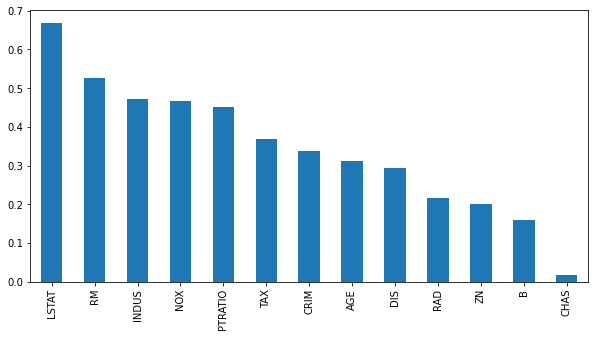

In [37]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10,5))

The output will be ranging between 0 to 1 and can determine a feature should retain or not,or we can set a threshold 

###### A.2 Chi-Square Test
The Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores.to correctly apply the chi-squared in order to test the relation between various features in the dataset and the target variable, the following conditions have to be met: the variables have to be categorical, sampled independently and values should have an expected frequency greater than 5.

###### A.3 Fisher’s Score

The algorithm which we will use returns the ranks of the variables based on the fisher’s score in descending order

In [68]:
from skfeature.function.similarity_based import fisher_score
from sklearn.datasets import load_diabetes

db = load_diabetes()
y_train = db.target
X_train = db.data

idx = fisher_score.fisher_score(X_train, y_train, mode='rank') #returns rank directly instead of fisher score. so no need for feature_ranking
print(idx)
db.feature_names



[1 7 3 6 2 0 9 8 5 4]


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

##### A.4 Correlation Coefficient

Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.
If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information.

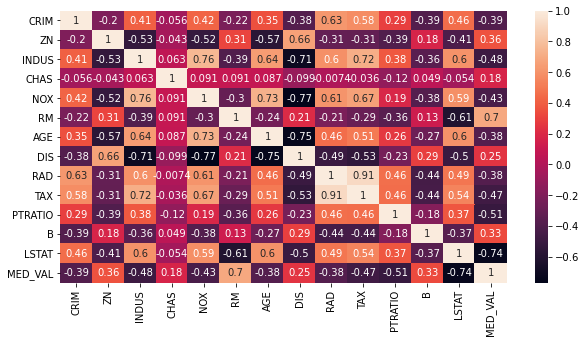

In [83]:
from sklearn.datasets import load_boston 
import pandas as pd 
     
dataset = load_boston() 
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.DataFrame(dataset.target, columns=['MED_VAL'])

df = pd.concat([X,y],axis=1)

cor = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True)


### B. Wrapper Methods

In wrapper methods, the feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset.It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. The evaluation criterion is simply the performance measure which depends on the type of problem, for e.g. For regression evaluation criterion can be p-values, R-squared, Adjusted R-squared, similarly for classification the evaluation criterion can be accuracy, precision, recall, f1-score, etc. Finally, it selects the combination of features that gives the optimal results for the specified machine learning algorithm. 

Some of the techniques

###### B.1.Forward Feature Selection
###### B.2.Backward Elimination
###### B.3.Bi-directional Elimination(Stepwise Selection)

###### B.1.Forward Feature Selection
In forward selection, we start with a null model and then start fitting the model with each individual feature one at a time and select the feature with the minimum p-value. Now fit a model with two features by trying combinations of the earlier selected feature with all other remaining features. Again select the feature with the minimum p-value. Now fit a model with three features by trying combinations of two previously selected features with other remaining features. Repeat this process until we have a set of selected features with a p-value of individual features less than the significance level.
the steps for the forward selection technique are as follows

1.Choose a significance level (e.g. SL = 0.05 with a 95% confidence).

2.Fit all possible simple regression models by considering one feature at a time. Total ’n’ models are possible. Select   the feature with the lowest p-value.

3.Fit all possible models with one extra feature added to the previously selected feature(s).

4.Again, select the feature with a minimum p-value. if p_value < significance level then go to Step 3, otherwise       terminate the process.

implementation using mlxtend library by boston data.

In [87]:
# !pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

#Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
         k_features=11, #will be the selected features
         forward = True,
         floating = False,
         scoring = 'r2',
         cv = 0)

In [93]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [113]:
sfs.fit(X,y)
print("most relevent features uisng Sequential Forward Selection",sfs.k_feature_names_)

most relevent features uisng Sequential Forward Selection ('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')


###### B.2 Backward Elimination

In backward elimination, we start with the full model (including all the independent variables) and then remove the insignificant feature with the highest p-value(> significance level). This process repeats again and again until we have the final set of significant features.
the steps involved in backward elimination are as follows:

1.Choose a significant level(SL=0.05 with a 95%)
2.Fit full model including all the feature
3.Consider the feature with highest p-value,which is grater than significant level,then do step 4,or terminate the process
4.REmove the feature which is under consideration.
5.Fit the model without this feature,Repeat the entire process from step3.

Implementing Backward Elimination mlxtend library.

In [107]:
#Sequential Backward Selection.

sbs = SFS(LinearRegression(),
         k_features=11,
         forward=False,
         floating=False,
         cv=0)

In [108]:
sbs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=11)

In [112]:
print("relevent features using Sequential Backward Selection : ",sbs.k_feature_names_)

relevent features using Sequential Backward Selection :  ('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')


##### B.3 Bi-Directional Elemination

It is similar to forward selection but the difference is while adding a new feature it also checks the significance of already added features and if it finds any of the already selected features insignificant then it simply removes that particular feature through backward elimination.
